**Question 1:**
Create three variables: Sensor_IDs, Temperature_Readings, and Humidity_Levels.
1. Assign five unique random values to each variable.
2. Ensure that each Sensor_ID is a unique alphanumeric string (use Hashing for unique sensor IDs).
3. Assign random temperature and humidity readings within valid ranges for five sensors.
4. Ensure that:
    * Each Sensor_ID is unique.
    * Temperature readings are between -10°C and 50°C.
    * Humidity levels are between 10% and 100%.
5. Print and validate the assigned values.

In [2]:
import numpy as np 
import uuid  # (Universal Unique Identifier) uuid module is used to get unique identifiers for sensor ids

# Generate 5 unique sensor IDs using UUID 
Sensor_IDs = [uuid.uuid4().hex for i in range(5)]

# Generate 5 random temperature readings between -10 and 50 (rounded to 2 decimals)
Temperature_Readings = [round(np.random.randint(-10, 50), 2) for i in range(5)]

# Generate 5 random humidity levels between 10 and 100 (rounded to 2 decimals)
Humidity_Levels = [round(np.random.randint(10, 100), 2) for i in range(5)]

print(f"Sensor IDs: {Sensor_IDs}")
print(f"Temperature Readings (°C): {Temperature_Readings}")
print(f"Humidity Levels (%): {Humidity_Levels}")

Sensor IDs: ['b20bfce1774c4ec6b5f85f466aa5007a', 'afccdb0cfac24b579a3221f49665c847', '9f6286efd9d8460e98a69769389a33c2', '56ce6c61a10a4f749a53bbb78e1133a4', '68639831f83a438eb5e5de85ac9d1260']
Temperature Readings (°C): [-9, 29, 39, -6, 48]
Humidity Levels (%): [33, 90, 42, 76, 40]


**Question 2:** Create a dictionary where:
1. The keys are Sensor_IDs.
2. The values are dictionaries containing Temperature_Reading and Humidity_Level.
3. Implement a function that:
    * Filters sensors exceeding a user-defined temperature threshold.
    * Sorts the dictionary in descending order by temperature.
    * Retrieves and prints the top 3 highest temperatures.
4. Ensure robustness by handling missing or invalid sensor readings.

In [4]:
# Create the sensor dictionary where key is sensor id and values are a dictionary containg temperature reading  and humidity level.
# Built in ZIP() function is used to zip sensor id, temperature reading and humidity levels together from task 1.
sensor_dict = {sid: {"Temperature": temp, "Humidity": humid} for sid, temp, humid in zip(Sensor_IDs, Temperature_Readings, Humidity_Levels)}

"""
Create a filtered dictionary based on user defined threshold
Sort the filtered dictionary in descending order by temperature 
Retrieves and prints the top 3 highest temperatures
"""
def sensor_filter(threshold, dct):
    # Create a dictionary filtered to filter sensors exceeding a user defined temperature threshold
    filtered = {}
    # iterate through dictionary with all the sensors and values 
    for sid, svalue in dct.items():
        # Use try and except for error handling and invlaid sersor readings
        try:
            temp = svalue["Temperature"]
            if temp is None or temp < -10 or temp > 50:
                continue 
            # if temperature is greater than user defined temperature threshold than add to filtered dictionary initiated earlier
            if temp > threshold: 
                filtered[sid] = svalue
        except KeyError:
            continue
    print(dct)
    # Sort filtered sensors dictionary by temperature in descending order
    sorted_dict = sorted(filtered.items(), key=lambda x: x[1]["Temperature"], reverse=True)
    
    # Filter top 3 seneor with highest temperature 
    top3 = sorted_dict[:3]
    print(f"\nTop 3 sensors with temperature exceeding {threshold}°C:")

    # Print top3 sersors and values with highest temperatures
    for sid, values in top3:
        print(f"Sensor ID: {sid} (Temperature: {values['Temperature']}°C , Humidity: {values['Humidity']}%)")


sensor_filter(15,sensor_dict)
        

    
    

{'b20bfce1774c4ec6b5f85f466aa5007a': {'Temperature': -9, 'Humidity': 33}, 'afccdb0cfac24b579a3221f49665c847': {'Temperature': 29, 'Humidity': 90}, '9f6286efd9d8460e98a69769389a33c2': {'Temperature': 39, 'Humidity': 42}, '56ce6c61a10a4f749a53bbb78e1133a4': {'Temperature': -6, 'Humidity': 76}, '68639831f83a438eb5e5de85ac9d1260': {'Temperature': 48, 'Humidity': 40}}

Top 3 sensors with temperature exceeding 15°C:
Sensor ID: 68639831f83a438eb5e5de85ac9d1260 (Temperature: 48°C , Humidity: 40%)
Sensor ID: 9f6286efd9d8460e98a69769389a33c2 (Temperature: 39°C , Humidity: 42%)
Sensor ID: afccdb0cfac24b579a3221f49665c847 (Temperature: 29°C , Humidity: 90%)


**Question 3:** Define a variable air_quality that can take one of the following values: 'Good', 'Moderate', 'Unhealthy', or 'Hazardous'.
1. Implement a function that:
    * Recommends an activity based on air quality.
    * Handles unexpected inputs and prompts the user for correction.
2. Simulate air quality readings over 10 instances:
    * Randomly assign one of the four air quality categories to each instance.
    * Count how many times each category appears.
    * Calculate and print the percentage of occurrences for each category.
    * Display the results in a structured format (e.g., table or dictionary).

In [6]:
import random
import numpy as np
"""
* Function which takes air quality values and recommends an activity

"""

def air_quality(quality):

    # Capitalizes the input from user to match pre defined air quality categories
    quality = quality.capitalize()

    # Define air qualities as dictionary keys with values being activities which can be performed
    activity = {
                "Good": [
                    "Walking, running, or cycling outdoors",
                    "Playing sports or hiking",
                    "Gardening or having a picnic",
                    "General outdoor recreation",
                ],
                "Moderate": [
                    "Light to moderate exercise outdoors",
                    "Walking or light cycling",
                    "Gardening with reduced exertion",
                    "Indoor exercise (gym, home workouts)",
                    "Indoor games and hobbies",
                    "Socializing indoors",
                ],
                "Unhealthy": [
                    "Staying indoors with windows closed",
                    "Light indoor exercise",
                    "Reading, watching movies, or playing games",
                    "Indoor hobbies and crafts",
                    "Short, light walks if absolutely necessary",
                ],
                "Hazardous": [
                    "Staying indoors with windows and doors sealed",
                    "Resting and avoiding exertion",
                    "Indoor activities that do not involve physical strain",
                    "Following directions from local officials",
                ],
            }

    # Recommend an activity by using random.choice to pick a random activity from pre-defined dictionary where keys are different air qualities and values are activities
    if quality in activity:
        return random.choice(activity[quality])
    # Handles unexpected inputs and prompts the user for correction.
    else:
        return "Invalid air quality input."

# List of air quality categoried
categories = ['Good', 'Moderate', 'Unhealthy','Hazardous']

# Create a list of air quality to simulate over ten instances 
sim_categories = [random.choice(categories) for i in range(10)]

# Convert list into numpy array to use numpy functions
sim_array = np.array(sim_categories)

# Count different unique air quality categories and its instances in the array
unique_values, counts = np.unique(sim_array, return_counts = True)

# Zip unqiue air qualities and respective air instances together in a dictionary
quality_count = dict(zip(unique_values, counts))

# Calcualte percentage of each air quality occured out of 10 instances 
percentage_quality = {val: round(cnt/10*100,2) for val, cnt in quality_count.items()}

# Print simualted list, air quality count and air quality percentage 
print(f"Simulated Air Qualities: {sim_categories}")
print(f"Air Quality Count: {quality_count}")
print(f"Air Quality by Percentage (%): {percentage_quality}")

    

Simulated Air Qualities: ['Hazardous', 'Moderate', 'Moderate', 'Unhealthy', 'Moderate', 'Moderate', 'Good', 'Moderate', 'Unhealthy', 'Moderate']
Air Quality Count: {'Good': 1, 'Hazardous': 1, 'Moderate': 6, 'Unhealthy': 2}
Air Quality by Percentage (%): {'Good': 10.0, 'Hazardous': 10.0, 'Moderate': 60.0, 'Unhealthy': 20.0}


**Question 4** Write a while loop that continuously prompts the user to enter a number:
1. Break the loop when a negative number is entered.
2. Classify even and odd numbers, storing them in separate lists.
3. Log both lists to a text file (loop_log.txt) upon loop termination.
4. Ensure error handling for non-numeric inputs.
5. Validate input to prevent duplicate entries in storage.

In [8]:
# Initiate three list for even, odd and inputs 
even = []
odd = []
inputs = []
print("\nEnter numbers one by one. Enter a negative number to exit.")

# Loop to take inputs until a negative number is entered 
while True:
    # Save input in a variable
    usr_input = input("Enter a number: ")

    # Ensure error handling for non-numeric inputs
    try:
        num = float(usr_input)
    except ValueError:
        print("Invalid input. PLease enter a numeric value.")
        continue

    # Validate input to prevent duplicate entries in storage
    if num in inputs:
        print("Duplicate entry detected. Please enter a different number.")
        continue

    # Break the loop if a negative number is entered
    if num < 0:
        print("Negative number detected, Exit!")
        break

    # Check for even numbers and stores number in even and inputs list 
    if num%2 ==0:
        even.append(num)
        inputs.append(num)

    # Check for odd numbers and stores number in odd and input list 
    else:
        odd.append(num)
        inputs.append(num)
        
# Log the results to a text file
with open("loop_log.txt", "w") as f:
    f.write("Even Numbers: " + str(even) + "\n")
    f.write("Odd Numbers: " + str(odd) + "\n")
    
print("Even and odd numbers logged to 'loop_log.txt'.")


    


Enter numbers one by one. Enter a negative number to exit.


Enter a number:  2
Enter a number:  4
Enter a number:  6
Enter a number:  8
Enter a number:  0
Enter a number:  9
Enter a number:  7
Enter a number:  5
Enter a number:  3
Enter a number:  1
Enter a number:  -1


Negative number detected, Exit!
Even and odd numbers logged to 'loop_log.txt'.


**Question 5**  Write a Python program that:
1. Accepts a scientific term as input.
2. Prints all characters at even positions in one line and odd positions in another.
3. Do this without using list slicing ([::]).

In [10]:
# Save scientific term into a variable 
sci_term = input("\nEnter a scientific term: ")

# Initiates strings for even and odd characters
even_char = ""
odd_char = ""

# Iterate through the scientific term provided by the user
for i in range(len(sci_term)):
    # Concats character to even_char if it is on a even index
    if i % 2 == 0:
        even_char+= sci_term[i]
    # Concats character to odd_char if it is on a odd index
    else:
        odd_char += sci_term[i]

# Print even_char and odd_char strings
print("Even position characters: ",even_char)
print("Odd position characters: ",odd_char)



Enter a scientific term:  x^2+x+5


Even position characters:  x2x5
Odd position characters:  ^++


**Question 6**
1. Read a dataset 'WeatherData.csv' using pandas (download the dataset from the Resources).
2. Display the number of weather stations (rows) and recorded parameters (columns).
3. Compute the mean wind speed and subtract it from all wind speed values.
4. Print both the original and modified

In [2]:
import pandas as pd

# Import the dataset using pandas and ensure that the file is in the same directory 
try:
    df = pd.read_csv("WeatherData.csv")
except FileNotFoundError:
    print("File not found in the same directory")
    df = None

if df is not None:
    # Drop last column which only has NULLs
    df = pd.DataFrame(df.iloc[:,0:-1])  #removing column with all NULL values

    # Print number of unique stations in the dataset
    print(f"\nNumber of weather stations: {len(df["Station_ID"].unique())}")

    # Print number of records for diffenent stations
    print(f"Number of recorded entries (rows): {df.shape[0]}")

    # Print number of recorded parameteres
    print(f"Number of recorded parameters (columns): {df.shape[1]}")

    # Calculate mean speed 
    mean_speed = df["Wind_Speed_kmh"].mean()

    # Create new parameter with mean speed subtracted from the original speed
    df["Mean_Wind_Speed"] = df["Wind_Speed_kmh"]-mean_speed
    
    #print(f"{df["Wind_Speed_kmh"].head()}, \n{df["Mean_Wind_Speed"].head()}")
    print(df[["Wind_Speed_kmh","Mean_Wind_Speed"]])
    


Number of weather stations: 20
Number of recorded entries (rows): 1000
Number of recorded parameters (columns): 6
     Wind_Speed_kmh  Mean_Wind_Speed
0             43.79         20.24154
1             17.41         -6.13846
2              2.12        -21.42846
3             12.39        -11.15846
4             27.33          3.78154
..              ...              ...
995           30.95          7.40154
996           22.47         -1.07846
997           44.60         21.05154
998           38.02         14.47154
999           24.52          0.97154

[1000 rows x 2 columns]


**Question 7** Read 'WeatherData.csv' and identify missing values.
1. Choose two different imputation techniques to handle missing values.
2. Justify why you selected each technique for the respective feature.
3. Compare the distribution of the imputed column before and after imputation.
4. Save the cleaned dataset (WeatherData_Cleaned.csv).

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Reload the original dataset for imputation comparison
df = pd.read_csv("WeatherData.csv")

# Drop last column which only has NULLs
df = pd.DataFrame(df.iloc[:,0:-1]) 

# Check number of NULLs in different columns
print("\nMissing values before imputation:")
print(df.isnull().sum())


Missing values before imputation:
Station_ID            0
Temperature_C        50
Humidity_%           50
Wind_Speed_kmh        0
Precipitation_mm      0
Weather_Condition     0
dtype: int64


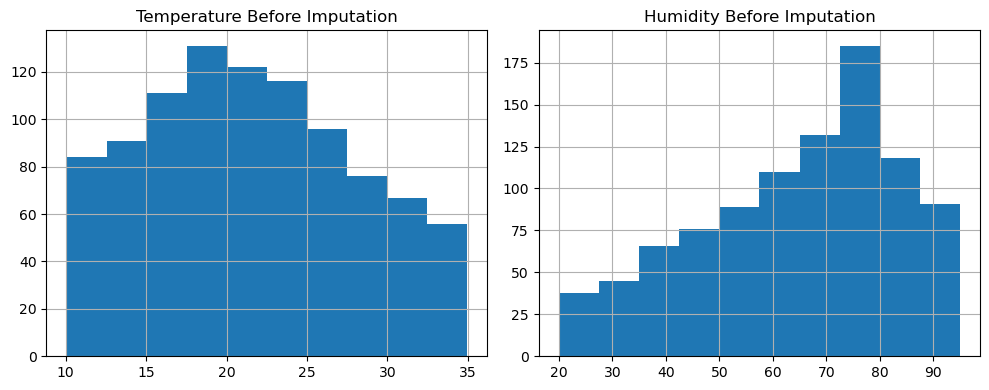

In [7]:
# Comparison of distributions before imputation
plt.figure(figsize=(10, 4))

# Create histogram for temperature before imputation 
plt.subplot(1, 2, 1)
df["Temperature_C"].hist()
plt.title("Temperature Before Imputation")

# Create histogram for humidity before imputaiton
plt.subplot(1, 2, 2)
df["Humidity_%"].hist()
plt.title("Humidity Before Imputation")

plt.tight_layout()
plt.show()



In [9]:
# Impute Temperature with mean grouped by Station_ID.
# Justification: Temperature is a continuous variable and it tends to follow a rough symmetric distribution therefore mean appraoch.
df["Temperature_C"] = df["Temperature_C"].fillna(df.groupby("Station_ID")["Temperature_C"].transform(lambda x: round(x.mean(),2)))
    
# Impute Humidity with median grouped by Station_ID.
# Justification: Humidity is numeric but a bounded percentage variable and is skewed due to environmental factors therefore median.
df["Humidity_%"] = df["Humidity_%"].fillna(df.groupby("Station_ID")["Humidity_%"].transform(lambda x: round(x.median(),2)))

# Ensure that all nulls have been filled
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Station_ID           0
Temperature_C        0
Humidity_%           0
Wind_Speed_kmh       0
Precipitation_mm     0
Weather_Condition    0
dtype: int64


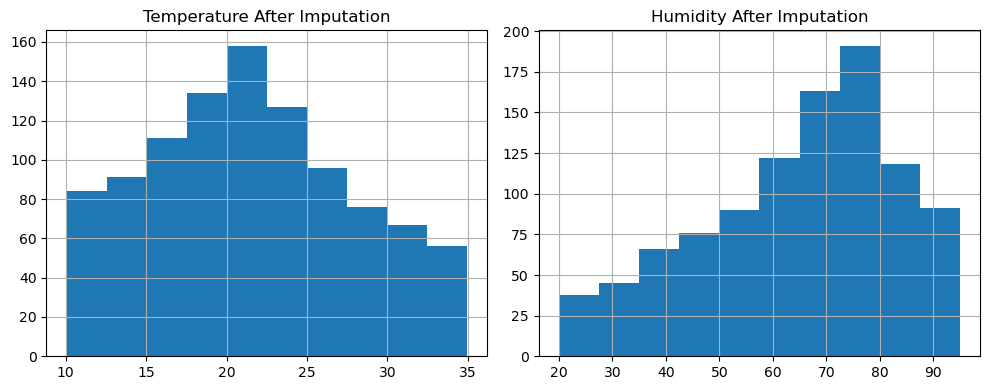

In [11]:
# Comparison of distributions after imputation
plt.figure(figsize=(10,4))

# Create temperature histogram after imputation
plt.subplot(1, 2, 1)
df["Temperature_C"].hist()
plt.title("Temperature After Imputation")

# Create humidity histogram after imputation
plt.subplot(1, 2, 2)
df["Humidity_%"].hist()
plt.title("Humidity After Imputation")

plt.tight_layout()
plt.show()

In [55]:
# Save the cleaned dataset
df.to_csv("WeatherData_Cleaned.csv", index=False)

**Question 8** Encode the 'Weather_Condition' column using appropriate encoding approach and display the encoded value.
1. Justify your selection of encoding technique.
2. Save the modified dataset as a new CSV file.

In [58]:
import pandas as pd

# Create copy of cleaned dataframe
df_encode = df.copy()

# Create copy of column 'Weather Condition' to have original column in the output after encoding
df_encode['Weather_Condition_Copy'] = df_encode['Weather_Condition']

# Justification - One-hot Encoding: 'Weather_Condition' is a categorical feature with no inherent order.
#   One-hot encoding creates a binary column for each unique value, which prevents
#   the model from assuming any ordinal relationship between the conditions.
df_encode = pd.get_dummies(df_encode, columns = ['Weather_Condition_Copy'], prefix='Weather', dtype = int)
df_encode.head()


,Station_ID,Temperature_C,Humidity_%,Wind_Speed_kmh,Precipitation_mm,Weather_Condition,Weather_Cloudy,Weather_Rainy,Weather_Stormy,Weather_Sunny
0,STN_1,21.60,80.01,43.79,25.21,Stormy,0,0,1,0
1,STN_2,17.20,70.50,17.41,8.76,Cloudy,1,0,0,0
2,STN_3,26.96,53.35,2.12,1.11,Sunny,0,0,0,1
3,STN_4,22.14,86.37,12.39,10.25,Rainy,0,1,0,0
4,STN_5,12.52,86.81,27.33,23.13,Stormy,0,0,1,0


In [60]:
# Save to CSV file
df_encode.to_csv("Weather_Data_Encoded.csv", index=False)

**Question 9** Apply Min-Max Scaling to all numerical columns, excluding Station_ID. Generate two visualizations:
1. Histogram of temperatures before and after scaling.
2. Boxplot of wind speed before and after scaling.
3. Analyze and explain the effect of Min-Max Scaling on the dataset’s distribution.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Create copy of cleaned dataframe
df_scale_orgl = df.copy()

# Select columns with numerical values and excluding 'Station_ID' if included
num_cols = df_scale_orgl.select_dtypes(include=['number']).columns.tolist()

# Ensure Station_ID columns is excluded from numerical columns list
if 'Station_ID' in num_cols:
    num_cols.remove('Station_ID')

# Apply MaxMinScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_scale_orgl[num_cols])


# Create copy for scaled values
df_scale = df_scale_orgl.copy()
df_scale[num_cols] = scaled

In [17]:
df_scale.head()

,Station_ID,Temperature_C,Humidity_%,Wind_Speed_kmh,Precipitation_mm,Weather_Condition
0,STN_1,0.463512,0.800641,0.876690,0.840560,Stormy
1,STN_2,0.287089,0.673739,0.344299,0.291861,Cloudy
2,STN_3,0.678428,0.444889,0.035721,0.036691,Sunny
3,STN_4,0.485164,0.885508,0.242987,0.341561,Rainy
4,STN_5,0.099439,0.891380,0.544501,0.771181,Stormy


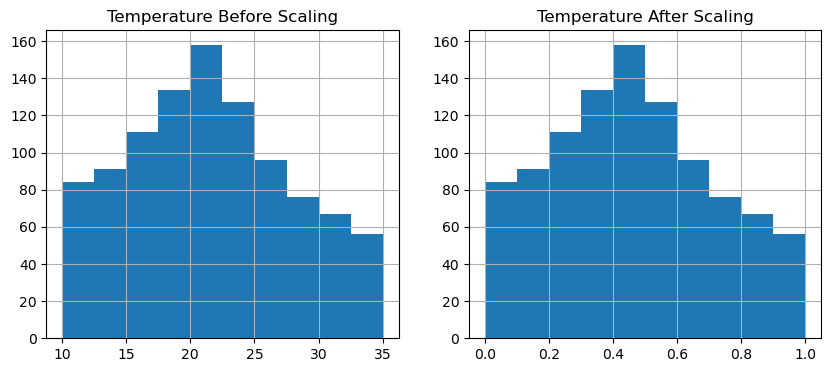

In [65]:
# Visualising Temperature Before and After Scaling
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

# Create temperature histogram before scaling
df_scale_orgl['Temperature_C'].hist()
plt.title("Temperature Before Scaling")
plt.subplot(1,2,2)

# Create temperature histogram after scaling
df_scale['Temperature_C'].hist()
plt.title("Temperature After Scaling")
plt.show()

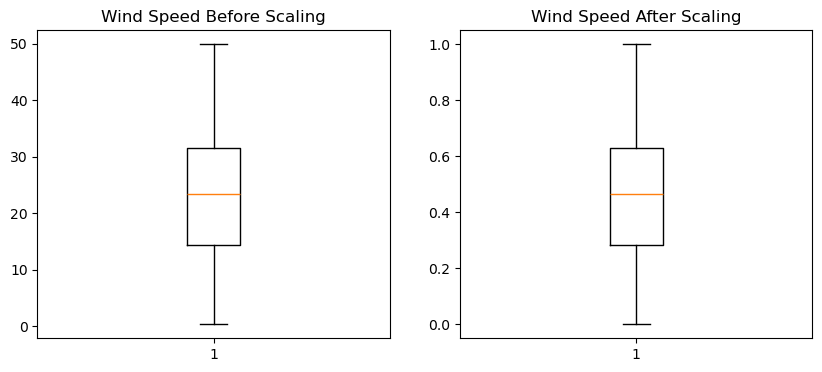

In [67]:
# Visualising Wind Speed Before and After Scaling
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

# Create Wind Speed box plot before scaling
plt.boxplot(df_scale_orgl['Wind_Speed_kmh'])
plt.title("Wind Speed Before Scaling")
plt.subplot(1,2,2)

# Create Wind speed box plot after scaling
plt.boxplot(df_scale['Wind_Speed_kmh'])
plt.title("Wind Speed After Scaling")
plt.show()

**Scaling Before and After Analysis** There has been no effect of maxmin scaling on the distribution of the features. Distribution for Temperature and WindSpeed are same before and after scaling. However, values have been scaled to be between 0 and 1 where value closer to 0 represents lower value and values closer to 1 represent higher values. Min_max Scaling allows all features to contribute to the model equally.